In [126]:
%matplotlib inline
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [127]:
img_name = "mejiro_1.jpg"
# 画像の読み込み(RGB)
img = cv2.imread("./img/mejiro/"+img_name)
# 画像の読み込み(グレースケール)
gray = cv2.imread("./img/mejiro/"+img_name, 0)
# 画像の読み込み(RGBA)
rgba = cv2.imread("./img/mejiro/"+img_name, -1)

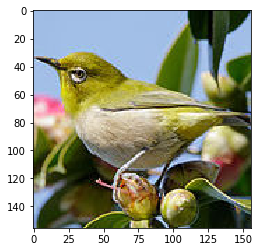

In [128]:
show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img) #表示

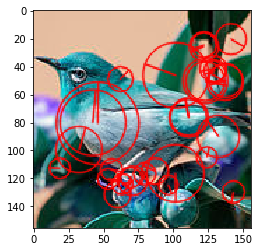

(<matplotlib.image.AxesImage at 0x1229f4160>, None)

In [129]:
surf = cv2.xfeatures2d.SURF_create(5000)
kp, des = surf.detectAndCompute(img,None)

img2 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()

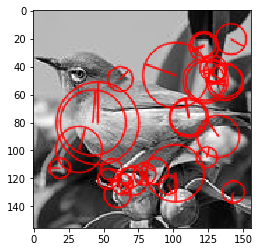

(<matplotlib.image.AxesImage at 0x122a561d0>, None)

In [130]:
surf = cv2.xfeatures2d.SURF_create(5000)
kp, des = surf.detectAndCompute(gray,None)
img2 = cv2.drawKeypoints(gray,kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()

In [131]:
def show_feature_values(name, num):
    img_path = "./img/"+name+"/"+name+"_"+str(num)+".jpg"
    
    print(img_path)
    
    if not os.path.isfile(img_path):
        return
    
    img = cv2.imread(img_path)
    gray = cv2.imread(img_path, 0)
    rgba = cv2.imread(img_path, -1)
    
    plt.figure(figsize=(20, 20))
    
    #画像をそのまま表示
    plt.subplot(1,4,1)
    show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.imshow(show_img) #表示
    
    #特徴量付きで表示 
    plt.subplot(1,4,2)
    surf = cv2.xfeatures2d.SURF_create(7500)
    kp, des = surf.detectAndCompute(img,None)
    img2 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)
    plt.imshow(img2)
    
    #グレースケールでの特徴量付きで表示 
    plt.subplot(1,4,3)
    surf = cv2.xfeatures2d.SURF_create(7000)
    kp, des = surf.detectAndCompute(gray,None)
    img3 = cv2.drawKeypoints(gray,kp,None,(255,0,0),4)
    plt.imshow(img3)
    
    plt.show()

./img/mejiro/mejiro_0.jpg


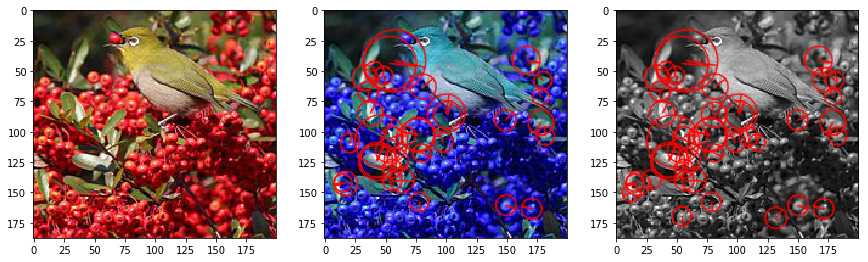

./img/mejiro/mejiro_1.jpg


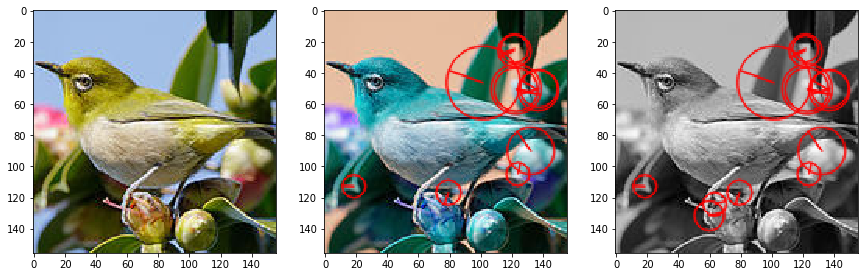

./img/mejiro/mejiro_2.jpg


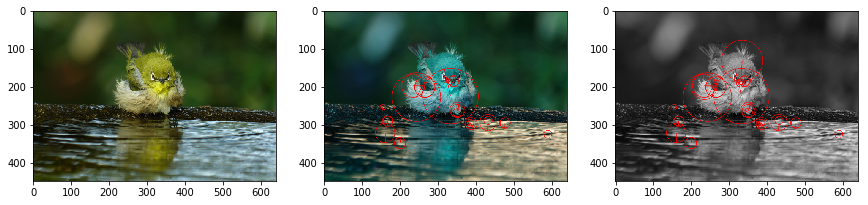

./img/mejiro/mejiro_3.jpg


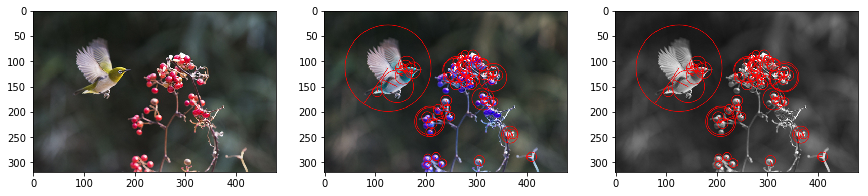

./img/mejiro/mejiro_4.jpg


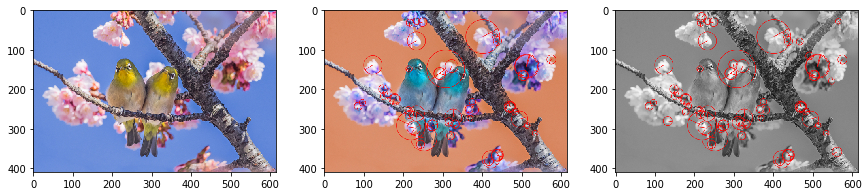

./img/mejiro/mejiro_5.jpg


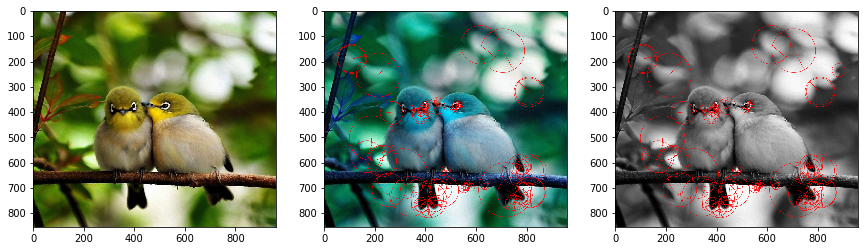

./img/mejiro/mejiro_6.jpg
./img/mejiro/mejiro_7.jpg


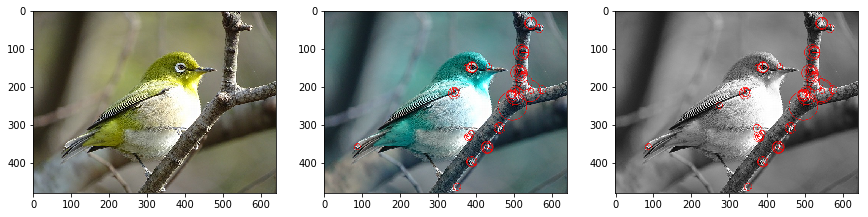

./img/mejiro/mejiro_8.jpg


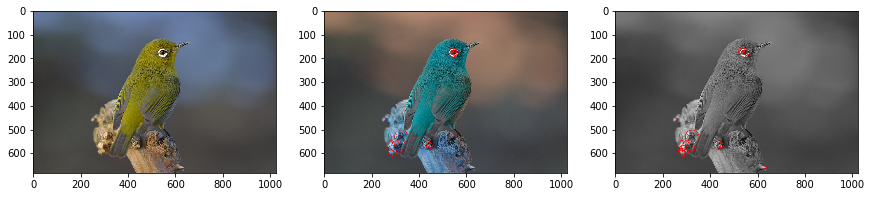

./img/mejiro/mejiro_9.jpg


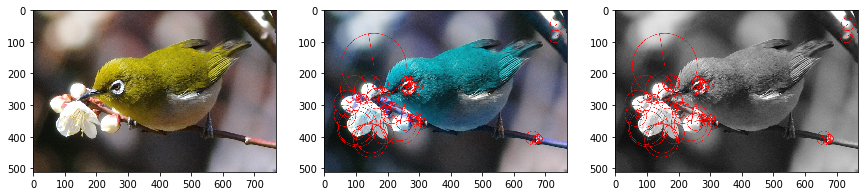

In [132]:
for i in range(10):
    show_feature_values("mejiro", i)

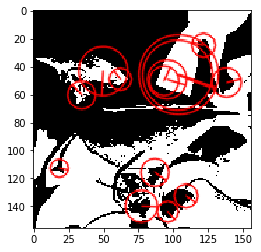

(<matplotlib.image.AxesImage at 0x121913358>, None)

In [157]:
surf = cv2.xfeatures2d.SURF_create(40000)
kp, des = surf.detectAndCompute(bin_img,None)
img2 = cv2.drawKeypoints(bin_img,kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()

In [160]:
r_img = cv2.imread("./img/mejiro/mejiro_8.jpg")
for index_r, row in enumerate(r_img):
    for index_p, pixel in enumerate(row):
#         if pixel[1]-pixel[0] < 20 and pixel[1]-pixel[2] < 20:
        if pixel[1] < 90 or pixel[0]+pixel[1]+pixel[2] < 50:
            r_img[index_r][index_p] = [0, 0, 0]
        else:
            r_img[index_r][index_p] = [255, 255, 255]
            
img_2 = cv2.imread("./img/mejiro/mejiro_8.jpg")
img_2_h = img_2.shape[0]
img_2_w = img_2.shape[1]

for index_r, row in enumerate(r_img):
    for index_c, pixel in enumerate(row):
        if index_r > img_2_h - 6 or index_c > img_2_w - 6:
            r_img[index_r][index_p] = [0, 0, 0]
        else:
            local_pixel_sum = 0
            for i in range(4):
                for j in range(4):
                    local_pixel_sum += sum(r_img[index_r+i][index_c+j])
            
            if local_pixel_sum < 255*2+1 or pixel[0] > 200:
                img_2[index_r][index_c] = [0, 0, 0]
            else:
                img_2[index_r][index_c] = [255, 255, 255]
                
       


/Users/noon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


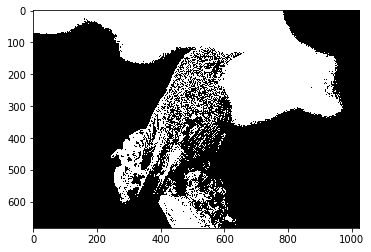

In [158]:
show_img = cv2.cvtColor(r_img, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img) #表示

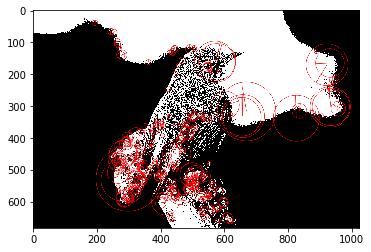

(<matplotlib.image.AxesImage at 0x1234e4be0>, None)

In [159]:
surf = cv2.xfeatures2d.SURF_create(20000)
kp, des = surf.detectAndCompute(r_img,None)
img2 = cv2.drawKeypoints(r_img,kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()

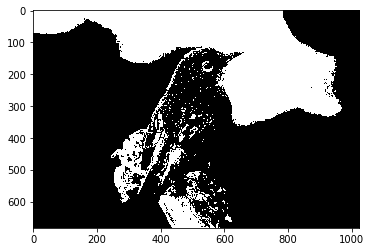

In [136]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(r_img,cv2.MORPH_OPEN,kernel,iterations = 1)
plt.imshow(opening,cmap='gray')

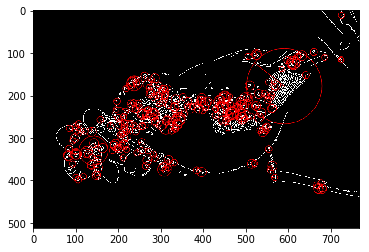

(<matplotlib.image.AxesImage at 0x125e19e10>, None)

In [152]:
# 入力画像を読み込み
img = cv2.imread("./img/mejiro/mejiro_9.jpg")

# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 方法2(OpenCVで実装)
edge2 = cv2.Canny(gray, 100, 200)

# 結果を出力
# cv2.imwrite("output2.jpg", edge2)
plt.imshow(edge2)

surf = cv2.xfeatures2d.SURF_create(7000)
kp, des = surf.detectAndCompute(edge2,None)
img2 = cv2.drawKeypoints(edge2,kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()

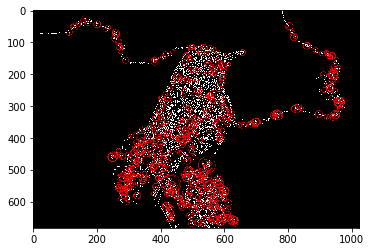

(<matplotlib.image.AxesImage at 0x122f6c780>, None)

In [155]:
# 方法2(OpenCVで実装)
edge3 = cv2.Canny(r_img, 100, 200)

# 結果を出力
# cv2.imwrite("output2.jpg", edge2)
plt.imshow(edge3)

surf = cv2.xfeatures2d.SURF_create(5000)
kp, des = surf.detectAndCompute(edge3,None)
img3 = cv2.drawKeypoints(edge3,kp,None,(255,0,0),4)
plt.imshow(img3),plt.show()